In [2]:
# Suppressing warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, VotingClassifier, VotingRegressor
from sklearn.metrics import f1_score, mean_squared_error, confusion_matrix, accuracy_score, classification_report
from sklearn import preprocessing, metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [3]:
# Load the dataset
df = pd.read_csv('WEATHER.csv')

# Display the first few rows of the dataframe
print(df.head())


        Date  Temp9am  Temp3pm  MinTemp  MaxTemp  Rainfall RainToday  \
0  1/17/2015     20.7     20.9     19.5     22.4      15.6       Yes   
1  1/18/2015     22.4     24.8     19.5     25.6       6.0       Yes   
2  1/19/2015     23.5     23.0     21.6     24.5       6.6       Yes   
3  1/20/2015     21.4     20.9     20.2     22.8      18.8       Yes   
4  1/21/2015     22.5     25.5     19.7     25.7      77.4       Yes   

   Evaporation  Sunshine WindGustDir  ...  WindDir9am WindDir3pm WindSpeed9am  \
0          6.2       0.0           W  ...           S        SSW           17   
1          3.4       2.7           W  ...           W          E            9   
2          2.4       0.1           W  ...         ESE        ESE           17   
3          2.2       0.0           W  ...         NNE          E           22   
4          4.8       0.0           W  ...         NNE          W           11   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \

In [4]:
#DATA Preprocessing
#Data Cleaning
# Handle Missing Values
# Let's fill missing numerical values with the mean of their respective columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [5]:
# For categorical variables, let's fill missing values with the most frequent value
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

In [6]:
# Convert Categorical Variables into Numerical using One-Hot Encoding for categorical variables
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_cols)

In [7]:
# Separate Features and Target Variable
X = df.drop(['Date', 'RainToday', 'Rainfall'], axis=1)  # Features
y = df['Rainfall']  # Target variable

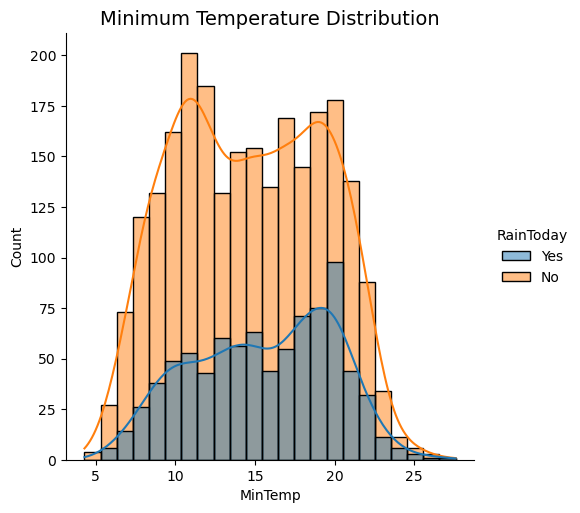

In [8]:
#Data Analysis: feature distribution
#MIN TEMP
sns.displot(df, x="MinTemp", hue='RainToday', kde=True)
plt.title("Minimum Temperature Distribution", fontsize = 14)
plt.show()

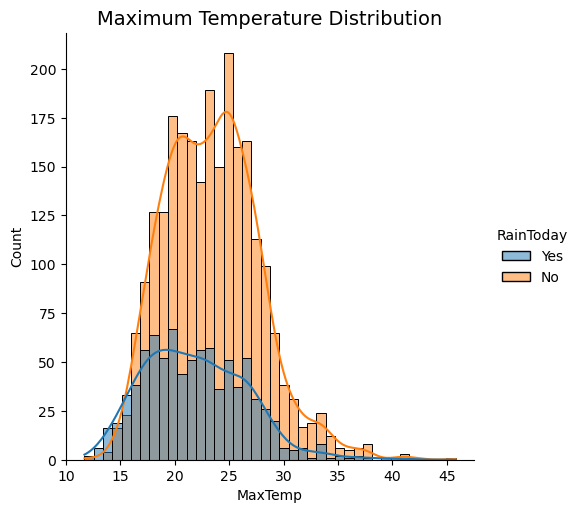

In [9]:
#Data Analysis: feature distribution
#MAX TEMP
sns.displot(df, x="MaxTemp", hue='RainToday', kde=True)
plt.title("Maximum Temperature Distribution", fontsize = 14)
plt.show()

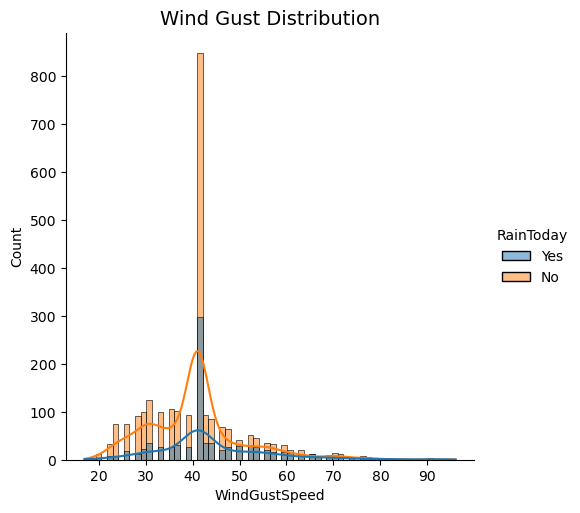

In [10]:
#Data Analysis: feature distribution
#WINDGUSTDIST
sns.displot(df, x="WindGustSpeed", hue='RainToday', kde=True)
plt.title("Wind Gust Distribution", fontsize = 14)
plt.show()

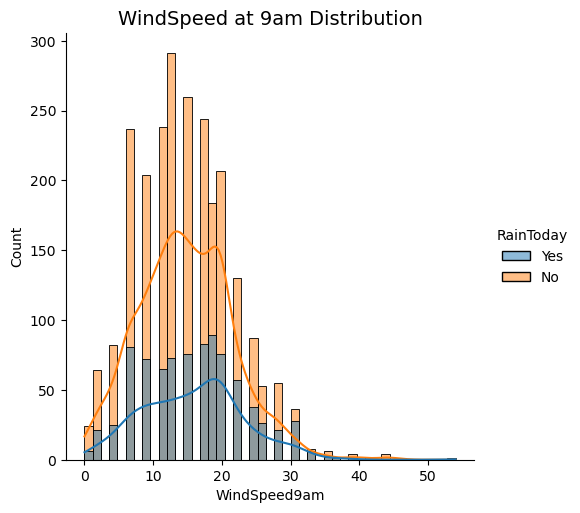

In [11]:
#Data Analysis: feature distribution
#WINDGUSTDIST 9AM
sns.displot(df, x="WindSpeed9am", hue='RainToday', kde=True)
plt.title("WindSpeed at 9am Distribution", fontsize = 14)
plt.show()

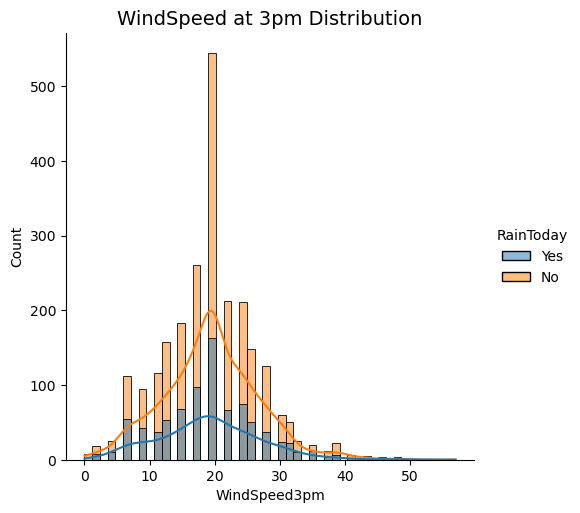

In [12]:
#Data Analysis: feature distribution
#WINDGUSTDIST 3PM
sns.displot(df, x="WindSpeed3pm", hue='RainToday', kde=True)
plt.title("WindSpeed at 3pm Distribution", fontsize = 14)
plt.show()

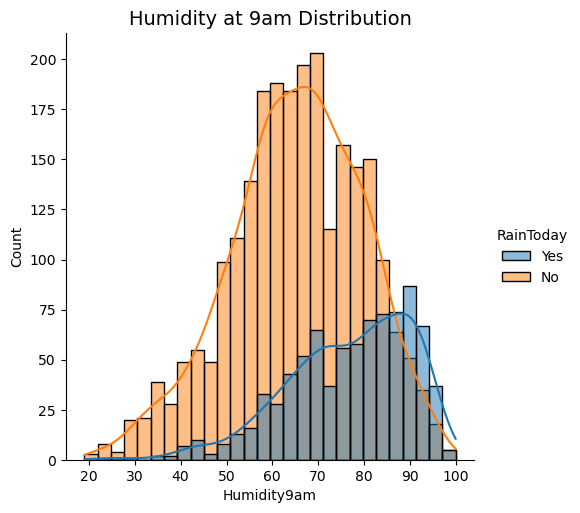

In [13]:
#Data Analysis: feature distribution
#HUMIDITY 9AM
sns.displot(df, x="Humidity9am", hue='RainToday', kde=True)
plt.title("Humidity at 9am Distribution", fontsize = 14)
plt.show()


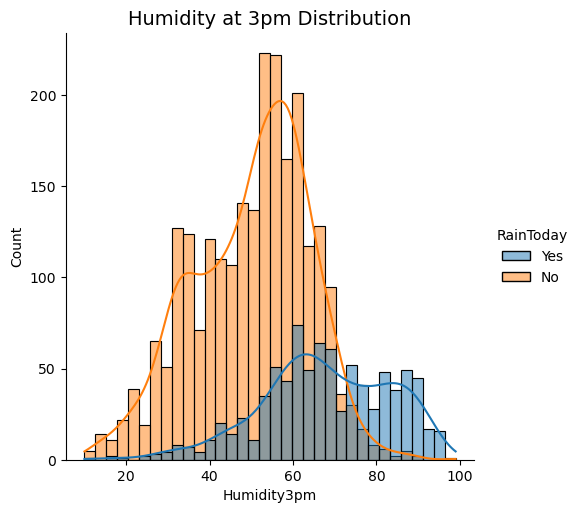

In [14]:
#Data Analysis: feature distribution
#HUMIDITY 3PM
sns.displot(df, x="Humidity3pm", hue='RainToday', kde=True)
plt.title("Humidity at 3pm Distribution", fontsize = 14)
plt.show()

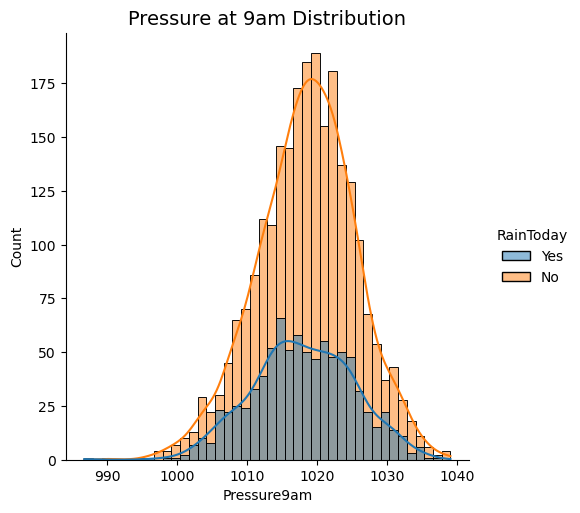

In [15]:
#Data Analysis: feature distribution
#PRESSURE 9AM
sns.displot(df, x="Pressure9am", hue='RainToday', kde=True)
plt.title("Pressure at 9am Distribution", fontsize = 14)
plt.show()

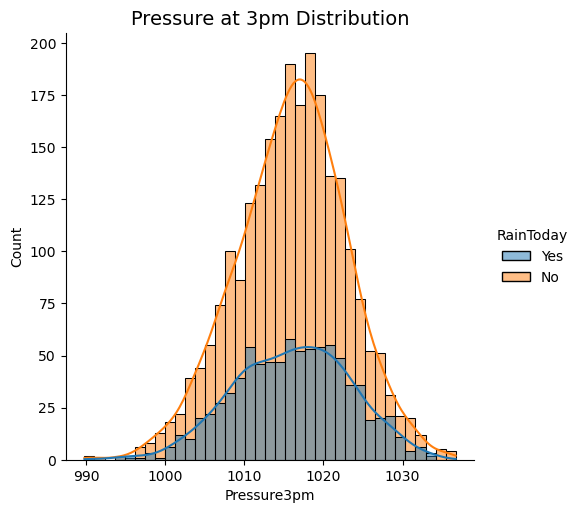

In [16]:
#Data Analysis: feature distribution
#PRESSURE 3PM
sns.displot(df, x="Pressure3pm", hue='RainToday', kde=True)
plt.title("Pressure at 3pm Distribution", fontsize = 14)
plt.show()

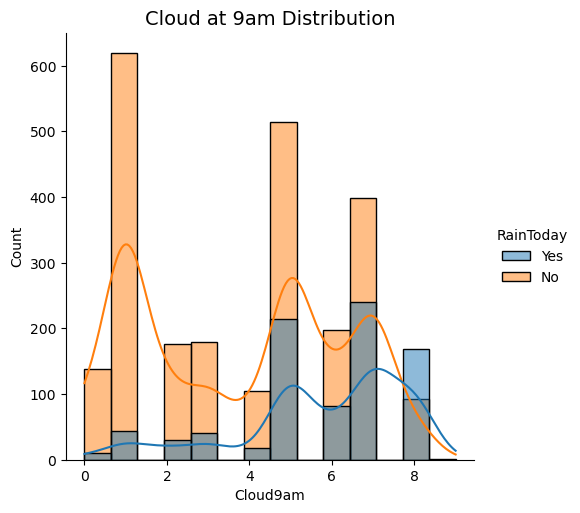

In [17]:
#Data Analysis: feature distribution
#CLOUD-DIST 9AM
sns.displot(df, x="Cloud9am", hue='RainToday', kde=True)
plt.title("Cloud at 9am Distribution", fontsize = 14)
plt.show()

In [18]:
#Data Analysis: feature distribution
#CLOUD-DIST 3PM
sns.displot(df, x="Cloud3pm", hue='RainToday', kde=True)
plt.title("Cloud at 3pm Distribution", fontsize = 14)
plt.show()


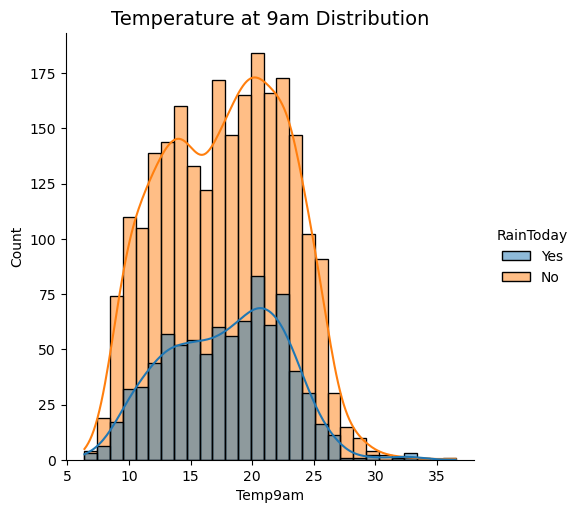

In [19]:
#Data Analysis: feature distribution
#CLOUD-DIST 9AM
sns.displot(df, x="Temp9am", hue='RainToday', kde=True)
plt.title("Temperature at 9am Distribution", fontsize = 14)
plt.show()


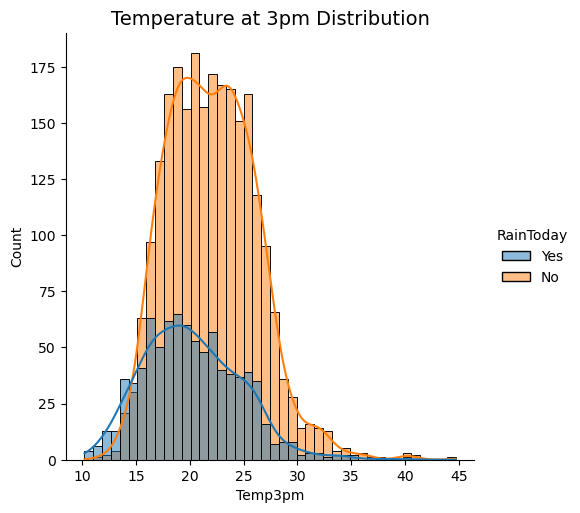

In [20]:
#Data Analysis: feature distribution
#CLOUD-DIST 3PM
sns.displot(df, x="Temp3pm", hue='RainToday', kde=True)
plt.title("Temperature at 3pm Distribution", fontsize = 14)
plt.show()


In [21]:
#Data Analysis: EDA
#AVG WINDSPEED ANALYSIS

# Convert 'Date' column to datetime, handling different formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by the extracted month and calculate mean wind speeds for 9am and 3pm
monthly_windspeed = df.groupby('Month')[['WindSpeed9am', 'WindSpeed3pm']].mean().reset_index()



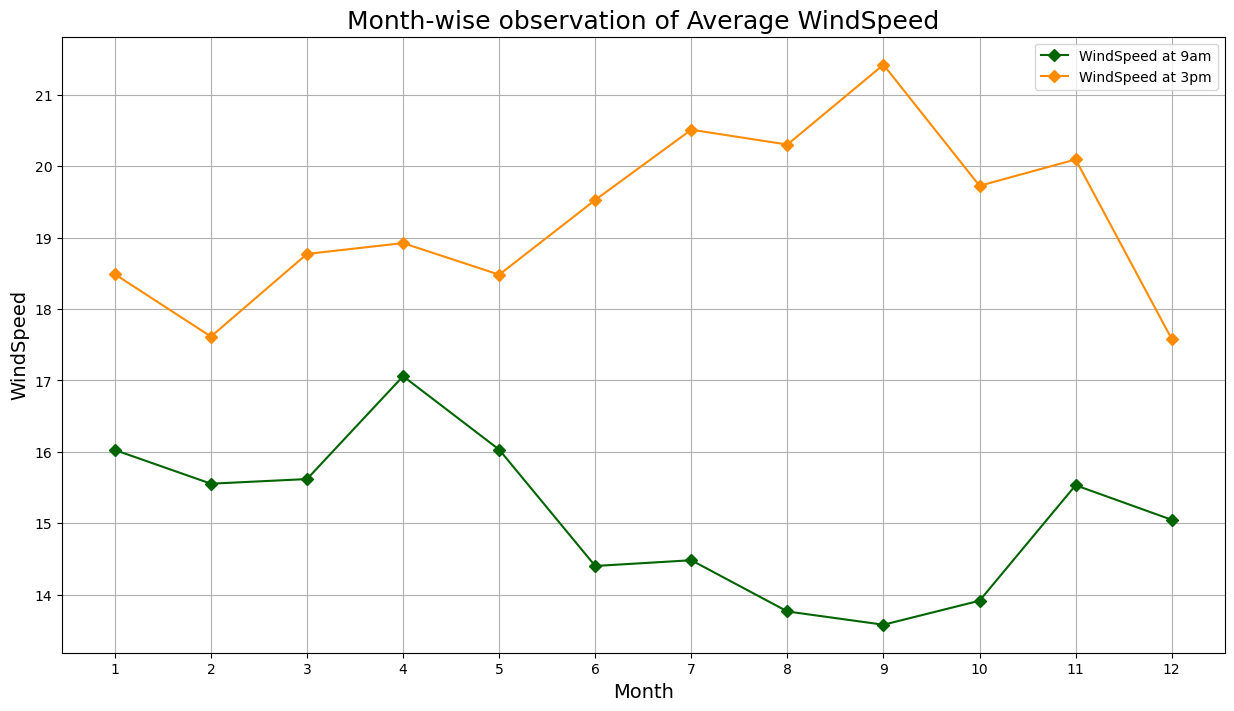

In [22]:
#Data Analysis: EDA
#AVG WINDSPEED OBSERVATION (LINE PLOT) 
# Plotting
x = monthly_windspeed['Month']
y1 = monthly_windspeed['WindSpeed9am']
y2 = monthly_windspeed['WindSpeed3pm']

plt.figure(figsize=(15, 8))
plt.plot(x, y1, marker='D', color='darkgreen', label='WindSpeed at 9am')
plt.plot(x, y2, marker='D', color='darkorange', label='WindSpeed at 3pm')
plt.xlabel('Month', fontsize=14)
plt.ylabel('WindSpeed', fontsize=14)
plt.title('Month-wise observation of Average WindSpeed', fontsize=18)
plt.xticks(range(1, 13))  # Set the x-axis to only show months 1 to 12
plt.legend(fontsize=10, loc='best')
plt.grid(True)
plt.show()

In [23]:
#Data Analysis: EDA
#AVG HUMIDITY ANALYSIS

# Convert 'Date' column to datetime, handling different formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by the extracted month and calculate mean humidity for 9am and 3pm
humidity_weather_df = df.groupby('Month')[['Humidity9am', 'Humidity3pm']].mean().reset_index()

In [24]:
#Data Analysis: EDA
#AVG HUMIDITY ANALYSIS OBSERVATION (STACKED BAR PLOT)
# Plotting
x = humidity_weather_df['Month']
y1 = humidity_weather_df['Humidity9am']
y2 = humidity_weather_df['Humidity3pm']

plt.figure(figsize=(15, 8))
bar_width = 0.35
index = x

plt.bar(index - bar_width/2, y1, bar_width, color='gold', label='Humidity at 9am')
plt.bar(index + bar_width/2, y2, bar_width, color='coral', label='Humidity at 3pm')

plt.xlabel('Month', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.title('Month-wise observation of Average Humidity', fontsize=18)
plt.xticks(index, range(1, 13))
plt.legend(fontsize=10, loc='best')
plt.grid(True)
plt.show()

In [25]:
#Data Analysis: EDA
#AVG PRESSURE ANALYSIS

# Convert 'Date' column to datetime, handling different formats
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Drop rows with invalid dates
df = df.dropna(subset=['Date'])

# Extract the month from the 'Date' column
df['Month'] = df['Date'].dt.month

# Group by the extracted month and calculate mean pressure for 9am and 3pm
pressure_weather_df = df.groupby('Month')[['Pressure9am', 'Pressure3pm']].mean().reset_index()

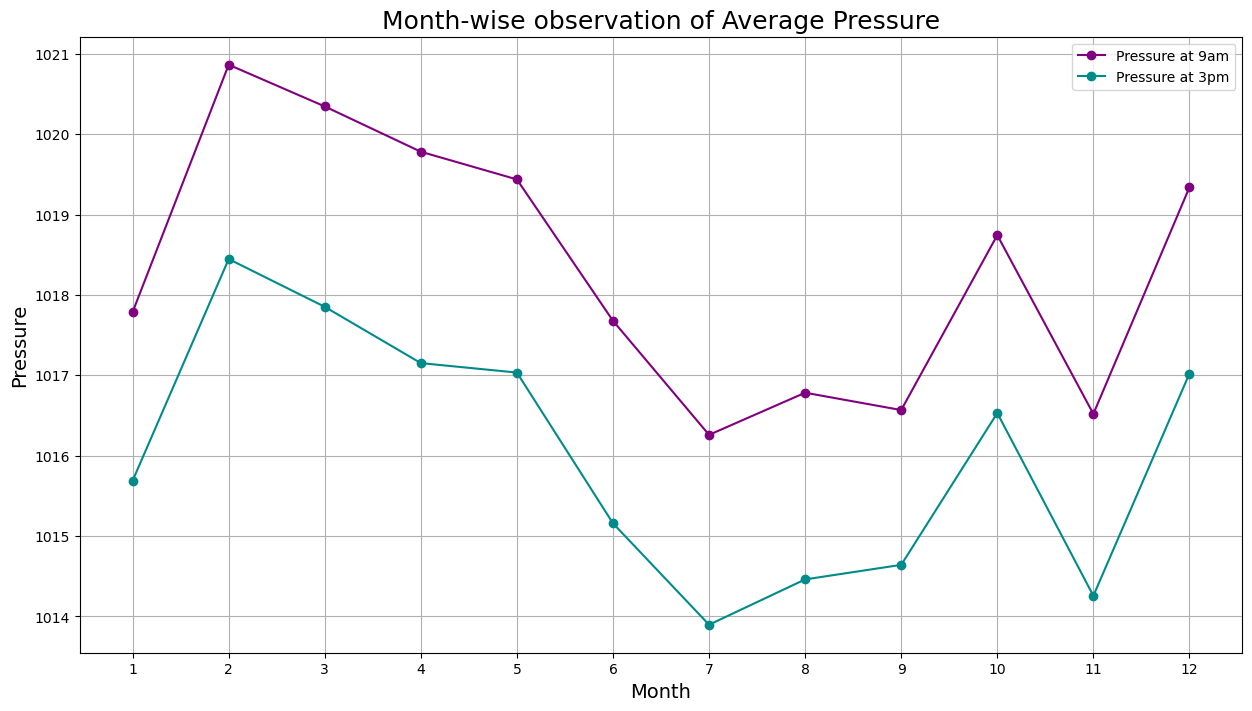

In [26]:
#Data Analysis: EDA
#AVG PRESSURE ANALYSIS (LINE PLOT)
# Plotting
x = pressure_weather_df['Month']
y1 = pressure_weather_df['Pressure9am']
y2 = pressure_weather_df['Pressure3pm']

plt.figure(figsize=(15, 8))
plt.plot(x, y1, marker='o', color='purple', label='Pressure at 9am')
plt.plot(x, y2, marker='o', color='darkcyan', label='Pressure at 3pm')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Pressure', fontsize=14)
plt.title('Month-wise observation of Average Pressure', fontsize=18)
plt.xticks(range(1, 13))  # Set the x-axis to only show months 1 to 12
plt.legend(fontsize=10, loc='best')
plt.grid(True)
plt.show()

In [27]:
#Data Analysis: EDA
#Correlation and Description of the data
bf=df.drop(columns=['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm'])
bf.corr()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  \
Temp9am        1.000000  0.828457  0.939307  0.858639 -0.054297     0.606122   
Temp3pm        0.828457  1.000000  0.753147  0.960805 -0.142748     0.474599   
MinTemp        0.939307  0.753147  1.000000  0.771005  0.013995     0.569316   
MaxTemp        0.858639  0.960805  0.771005  1.000000 -0.139306     0.510334   
Rainfall      -0.054297 -0.142748  0.013995 -0.139306  1.000000    -0.110343   
Evaporation    0.606122  0.474599  0.569316  0.510334 -0.110343     1.000000   
Sunshine       0.113891  0.345528 -0.063475  0.327422 -0.308962     0.175932   
WindGustSpeed  0.159570  0.036216  0.127792  0.073184  0.149811     0.245426   
WindSpeed9am  -0.334084 -0.351836 -0.298040 -0.349382  0.153696    -0.077532   
WindSpeed3pm   0.280009  0.136713  0.225905  0.155542  0.039415     0.292469   
Humidity9am   -0.145944 -0.155192  0.053946 -0.185382  0.332636    -0.395651   
Humidity3pm    0.131855 -0.212696  0.273269 -0.150741  0.305635    -0.102295   
Pressure9am   -0.417437 -0.342862 -0.391654 -0.385853 -0.037561    -0.343581   
Pressure3pm   -0.401353 -0.387945 -0.353334 -0.420375  0.001780    -0.298303   
Cloud9am       0.093204 -0.086544  0.241248 -0.084695  0.245231    -0.037051   
Cloud3pm       0.068683 -0.144965  0.164028 -0.099217  0.200999    -0.038422   
Month          0.269298  0.223978  0.284149  0.229074  0.007841     0.161738   

               Sunshine  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
Temp9am        0.113891       0.159570     -0.334084      0.280009   
Temp3pm        0.345528       0.036216     -0.351836      0.136713   
MinTemp       -0.063475       0.127792     -0.298040      0.225905   
MaxTemp        0.327422       0.073184     -0.349382      0.155542   
Rainfall      -0.308962       0.149811      0.153696      0.039415   
Evaporation    0.175932       0.245426     -0.077532      0.292469   
Sunshine       1.000000      -0.029032     -0.058410      0.177813   
WindGustSpeed -0.029032       1.000000      0.256460      0.509825   
WindSpeed9am  -0.058410       0.256460      1.000000      0.197669   
WindSpeed3pm   0.177813       0.509825      0.197669      1.000000   
Humidity9am   -0.490631      -0.225613     -0.189763     -0.288910   
Humidity3pm   -0.586476      -0.095037     -0.148849     -0.135039   
Pressure9am   -0.047789      -0.408876      0.003737     -0.333810   
Pressure3pm   -0.094507      -0.351850      0.091878     -0.277749   
Cloud9am      -0.665014       0.024275     -0.062441     -0.050932   
Cloud3pm      -0.677861       0.044016     -0.018030     -0.095435   
Month         -0.010061      -0.021639     -0.080324      0.059054   

               Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  \
Temp9am          -0.145944     0.131855    -0.417437    -0.401353  0.093204   
Temp3pm          -0.155192    -0.212696    -0.342862    -0.387945 -0.086544   
MinTemp           0.053946     0.273269    -0.391654    -0.353334  0.241248   
MaxTemp          -0.185382    -0.150741    -0.385853    -0.420375 -0.084695   
Rainfall          0.332636     0.305635    -0.037561     0.001780  0.245231   
Evaporation      -0.395651    -0.102295    -0.343581    -0.298303 -0.037051   
Sunshine         -0.490631    -0.586476    -0.047789    -0.094507 -0.665014   
WindGustSpeed    -0.225613    -0.095037    -0.408876    -0.351850  0.024275   
WindSpeed9am     -0.189763    -0.148849     0.003737     0.091878 -0.062441   
WindSpeed3pm     -0.288910    -0.135039    -0.333810    -0.277749 -0.050932   
Humidity9am       1.000000     0.657933     0.262098     0.249202  0.431550   
Humidity3pm       0.657933     1.000000     0.151608     0.179611  0.463529   
Pressure9am       0.262098     0.151608     1.000000     0.963307 -0.015889   
Pressure3pm       0.249202     0.179611     0.963307     1.000000  0.013787   
Cloud9am          0.431550     0.463529    -0.015889     0.013787  1.000000   
Cloud3pm          0.331062     0.472248    -0.0395

In [28]:
df.describe()

Date      Temp9am      Temp3pm      MinTemp  \
count                 3271  3271.000000  3271.000000  3271.000000   
mean   2019-07-10 00:00:00    17.821461    21.543656    14.877102   
min    2015-01-17 00:00:00     6.400000    10.200000     4.300000   
25%    2017-04-13 12:00:00    13.800000    18.400000    11.000000   
50%    2019-07-10 00:00:00    18.200000    21.300000    14.900000   
75%    2021-10-04 12:00:00    21.700000    24.500000    18.800000   
max    2023-12-31 00:00:00    36.500000    44.700000    27.600000   
std                    NaN     4.894316     4.297053     4.554710   

           MaxTemp     Rainfall  Evaporation     Sunshine  WindGustSpeed  \
count  3271.000000  3271.000000  3271.000000  3271.000000    3271.000000   
mean     23.005564     3.342158     5.175787     7.168970      41.476307   
min      11.700000     0.000000     0.000000     0.000000      17.000000   
25%      19.600000     0.000000     3.200000     4.250000      35.000000   
50%      22.800000     0.000000     4.800000     8.300000      41.000000   
75%      26.000000     1.400000     7.000000    10.200000      44.000000   
max      45.800000   119.400000    18.400000    13.600000      96.000000   
std       4.483752     9.917746     2.757684     3.815966      10.806951   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count   3271.000000   3271.000000  3271.000000  3271.000000  3271.000000   
mean      15.077041     19.294405    68.243962    54.698563  1018.334424   
min        0.000000      0.000000    19.000000    10.000000   986.700000   
25%       11.000000     15.000000    58.000000    44.000000  1013.700000   
50%       15.000000     19.000000    69.000000    56.000000  1018.600000   
75%       20.000000     24.000000    80.000000    64.000000  1023.100000   
max       54.000000     57.000000   100.000000    99.000000  1039.000000   
std        7.043825      7.453331    15.086127    16.279241     7.020090   

       Pressure3pm     Cloud9am     Cloud3pm        Month  
count  3271.000000  3271.000000  3271.000000  3271.000000  
mean   1016.003085     4.318557     4.176093     6.550290  
min     989.800000     0.000000     0.000000     1.000000  
25%    1011.300000     2.000000     2.000000     4.000000  
50%    1016.300000     5.000000     4.000000     7.000000  
75%    1020.800000     7.000000     7.000000    10.000000  
max    1036.700000     9.000000     8.000000    12.000000  
std       7.019915     2.526923     2.411274     3.435802

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3271 entries, 0 to 3270
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3271 non-null   datetime64[ns]
 1   Temp9am        3271 non-null   float64       
 2   Temp3pm        3271 non-null   float64       
 3   MinTemp        3271 non-null   float64       
 4   MaxTemp        3271 non-null   float64       
 5   Rainfall       3271 non-null   float64       
 6   RainToday      3271 non-null   object        
 7   Evaporation    3271 non-null   float64       
 8   Sunshine       3271 non-null   float64       
 9   WindGustDir    3271 non-null   object        
 10  WindGustSpeed  3271 non-null   int64         
 11  WindDir9am     3271 non-null   object        
 12  WindDir3pm     3271 non-null   object        
 13  WindSpeed9am   3271 non-null   int64         
 14  WindSpeed3pm   3271 non-null   int64         
 15  Humidity9am    3271 n

<Axes: >

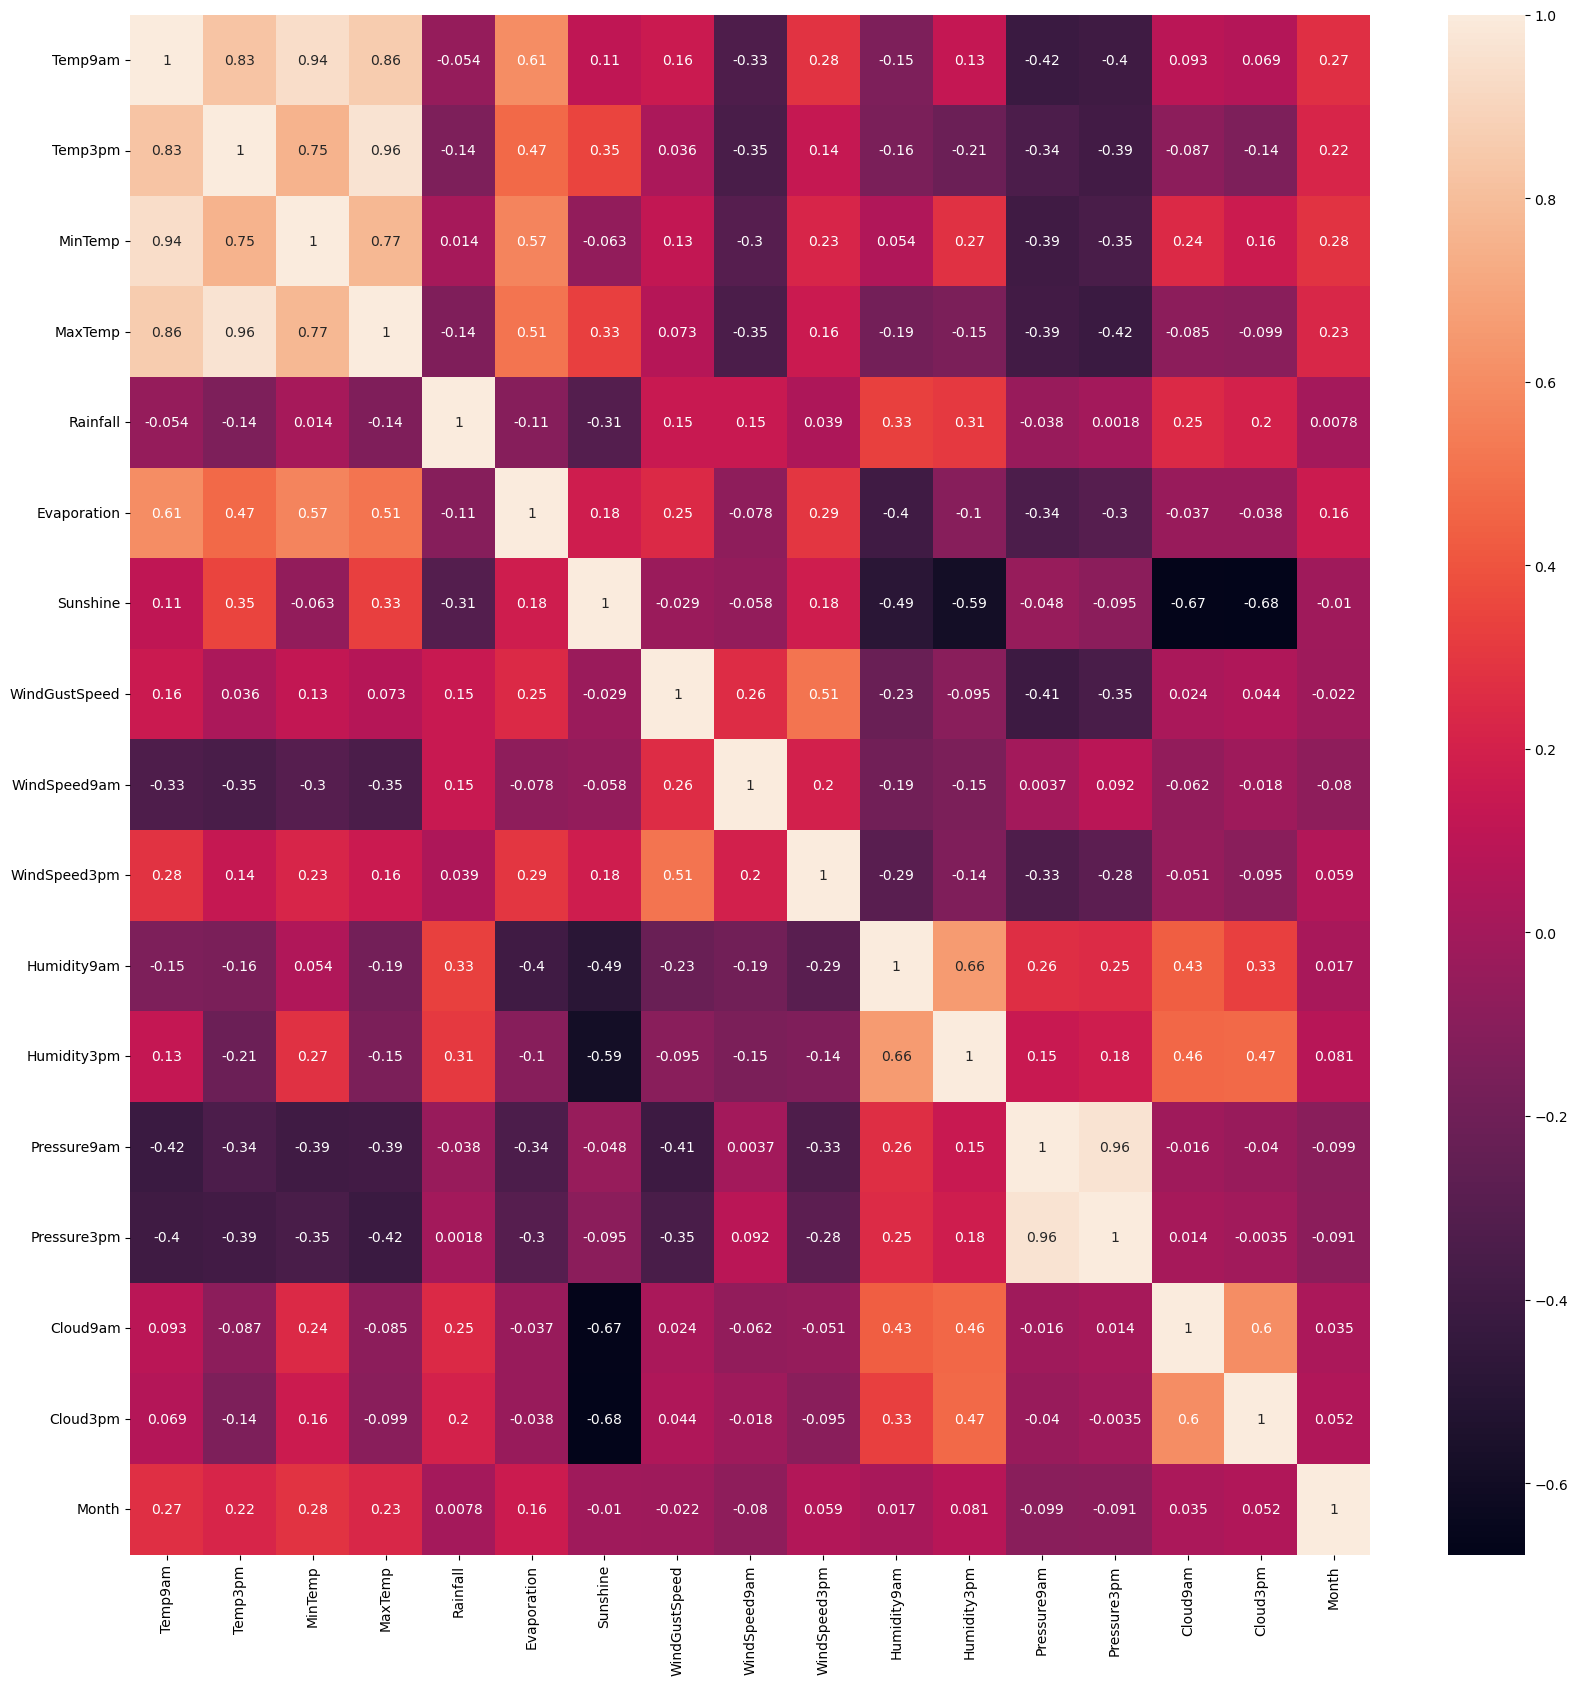

In [30]:
#Data Analysis: EDA
plt.figure(figsize=(20, 20))
sns.heatmap(bf.corr(), annot=True)

In [31]:
# Selecting the columns to be scaled
bf = df[['Temp9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Rainfall', 
         'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
         'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 
         'Pressure3pm', 'Cloud9am', 'Cloud3pm']]

#Standardize the Variables
# Scaling the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(bf)
df_feat = pd.DataFrame(scaled_features, columns=bf.columns)
df_feat = pd.DataFrame(scaled_features,columns=bf.columns[:16])
# Adding back the non-scaled columns
selected_columns = df[['Date','RainToday','WindGustDir', 'WindDir9am', 'WindDir3pm']]
df_feat = pd.concat([df_feat, selected_columns.reset_index(drop=True)], axis=1)
df_feat.head()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.588229 -0.149813  1.015126 -0.135078  1.236139     0.371460 -1.878965   
1  0.935624  0.757924  1.015126  0.578719  0.268029    -0.644040 -1.171303   
2  1.160409  0.338969  1.476258  0.333351  0.328536    -1.006719 -1.852755   
3  0.731274 -0.149813  1.168837 -0.045853  1.558843    -1.079254 -1.878965   
4  0.956059  0.920852  1.059043  0.601025  7.468346    -0.136290 -1.878965   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  Humidity3pm  Pressure9am  \
0      -0.044081      0.273041      0.094683  ...     1.800202    -0.104633   
1      -0.044081     -0.862879     -0.844638  ...     1.124391    -0.061892   
2      -0.044081      0.273041     -2.320714  ...     1.923076    -0.232857   
3      -0.044081      0.982991      0.094683  ...     2.168826    -0.589032   
4      -0.044081     -0.578899     -1.783959  ...     1.185828    -1.429605   

   Pressure3pm  Cloud9am  Cloud3pm       Date RainToday WindGustDir  \
0     0.199024  1.457110  1.586088 2015-01-17       Yes           W   
1     0.056550  1.061312  1.171306 2015-01-18       Yes           W   
2    -0.057429  1.061312  1.586088 2015-01-19       Yes           W   
3    -0.598829  1.457110  1.586088 2015-01-20       Yes           W   
4    -1.596144  1.457110  1.586088 2015-01-21       Yes           W   

  WindDir9am WindDir3pm  
0          S        SSW  
1          W          E  
2        ESE        ESE  
3        NNE          E  
4        NNE          W  

[5 rows x 21 columns]

In [32]:
#Transforming Categorical Variables:to convert categorical variables to binary variables to select what only neeed
# One-hot encoding for categorical variables
df_proc = pd.get_dummies(df_feat, columns=['WindGustDir', 'WindDir9am', 'WindDir3pm'])
df_proc.head()

Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
0  0.588229 -0.149813  1.015126 -0.135078  1.236139     0.371460 -1.878965   
1  0.935624  0.757924  1.015126  0.578719  0.268029    -0.644040 -1.171303   
2  1.160409  0.338969  1.476258  0.333351  0.328536    -1.006719 -1.852755   
3  0.731274 -0.149813  1.168837 -0.045853  1.558843    -1.079254 -1.878965   
4  0.956059  0.920852  1.059043  0.601025  7.468346    -0.136290 -1.878965   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindDir3pm_NNW  \
0      -0.044081      0.273041      0.094683  ...           False   
1      -0.044081     -0.862879     -0.844638  ...           False   
2      -0.044081      0.273041     -2.320714  ...           False   
3      -0.044081      0.982991      0.094683  ...           False   
4      -0.044081     -0.578899     -1.783959  ...           False   

   WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
0          False         False          False           False            True   
1          False         False          False           False           False   
2          False         False          False           False           False   
3          False         False          False           False           False   
4          False         False          False           False           False   

  WindDir3pm_SW WindDir3pm_W  WindDir3pm_WNW  WindDir3pm_WSW  
0         False        False           False           False  
1         False        False           False           False  
2         False        False           False           False  
3         False        False           False           False  
4         False         True           False           False  

[5 rows x 66 columns]

In [33]:
# replace the values of the 'RainToday' column changing them from a categorical column to a binary column. 
# Replace 'Yes'/'No' with 1/0 in 'RainToday' column
df_proc['RainToday'].replace(['No', 'Yes'], [0, 1], inplace=True)
df_proc[['Date','RainToday']]

Date  RainToday
0    2015-01-17          1
1    2015-01-18          1
2    2015-01-19          1
3    2015-01-20          1
4    2015-01-21          1
...         ...        ...
3266 2023-12-27          0
3267 2023-12-28          0
3268 2023-12-29          0
3269 2023-12-30          0
3270 2023-12-31          0

[3271 rows x 2 columns]

In [34]:
# Drop the 'Date' column
df_proc.drop('Date', axis=1, inplace=True)

In [35]:
#Data Preprocessing
#Rainfall Occurance Prediction

# Convert all data to float type
df_proc = df_proc.astype(float)

# Defining features and target variable
features = df_proc.drop(columns='RainToday')
Y = df_proc['RainToday']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

# Display the first few rows of the processed dataframe and the shapes of train and test sets
df_proc.head(), x_train.shape, x_test.shape, y_train.shape, y_test.shape

(    Temp9am   Temp3pm   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
 0  0.588229 -0.149813  1.015126 -0.135078  1.236139     0.371460 -1.878965   
 1  0.935624  0.757924  1.015126  0.578719  0.268029    -0.644040 -1.171303   
 2  1.160409  0.338969  1.476258  0.333351  0.328536    -1.006719 -1.852755   
 3  0.731274 -0.149813  1.168837 -0.045853  1.558843    -1.079254 -1.878965   
 4  0.956059  0.920852  1.059043  0.601025  7.468346    -0.136290 -1.878965   
 
    WindGustSpeed  WindSpeed9am  WindSpeed3pm  ...  WindDir3pm_NNW  \
 0      -0.044081      0.273041      0.094683  ...             0.0   
 1      -0.044081     -0.862879     -0.844638  ...             0.0   
 2      -0.044081      0.273041     -2.320714  ...             0.0   
 3      -0.044081      0.982991      0.094683  ...             0.0   
 4      -0.044081     -0.578899     -1.783959  ...             0.0   
 
    WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  WindDir3pm_SSE  WindDir3pm_SSW  \
 0            0.0   

In [36]:
#Logistic Regression Model
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [37]:
#KNN Classification Model
KNN = KNeighborsClassifier(n_neighbors=4)
KNN.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [38]:
#Decision Tree Classification Model
Tree = DecisionTreeClassifier()
Tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
#SVM Classification Model
SVM = svm.SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
#Random Forest Classification Model
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [42]:

# Convert x_test to a numpy array
x_test_array = np.array(x_test)

# Calculate accuracy scores
LR_Accuracy_Score = metrics.accuracy_score(y_test, LR.predict(x_test_array))
KNN_Accuracy_Score = metrics.accuracy_score(y_test, KNN.predict(x_test_array))
Tree_Accuracy_Score = metrics.accuracy_score(y_test, Tree.predict(x_test_array))
SVM_Accuracy_Score = metrics.accuracy_score(y_test, SVM.predict(x_test_array))
RFC_Accuracy_Score = metrics.accuracy_score(y_test, RFC.predict(x_test_array))

# Calculate F1 scores
LR_F1_Score = metrics.f1_score(y_test, LR.predict(x_test_array))
KNN_F1_Score = metrics.f1_score(y_test, KNN.predict(x_test_array), average='weighted')
Tree_F1_Score = metrics.f1_score(y_test, Tree.predict(x_test_array))
SVM_F1_Score = metrics.f1_score(y_test, SVM.predict(x_test_array))
RFC_F1_Score = metrics.f1_score(y_test, RFC.predict(x_test_array))

# Create the report
Report = {
    'Classification Algorithm': [
        'Logistic Regression', 'KNN', 'Decision Tree', 'SVM', 'Random Forest'
    ],
    'Accuracy Score': [
        LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score, RFC_Accuracy_Score
    ],
    'F1-score': [
        LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score, RFC_F1_Score
    ]
}

Report = pd.DataFrame(Report)
Report

Classification Algorithm  Accuracy Score  F1-score
0      Logistic Regression        0.823581  0.620301
1                      KNN        0.800000  0.774730
2            Decision Tree        0.773799  0.584270
3                      SVM        0.828821  0.618677
4            Random Forest        0.829694  0.609218

In [43]:
#visualizing of accuracies 
fig = make_subplots(rows=1, cols=1)
fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['Accuracy Score'], name='Accuracy Score'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Classification Algorithm'], y=Report['F1-score'], name='F1-score'), row=1,col=1
)
fig.update_layout(title_text="Accuracy Scores Of Classification Algorithms")
fig.update_yaxes(title_text="Score", row=1, col=1)
fig.update_xaxes(title_text="Classification Algorithm", row=1, col=1)
fig.show()


In [44]:
#Data Preprocessing
#Rainfall Amount Prediction
df_proc = df_proc.astype(float)
features = df_proc.drop(columns='Rainfall', axis=1)
Y = df_proc['Rainfall']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

In [45]:
#Linear Regression
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [46]:
#Random Forest Regression Model
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [47]:
# SVM Regression Model
SVRR = SVR()
SVRR.fit(x_train, y_train)

SVR()

In [48]:
#Regression report on rainfall amount prediction
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVRR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVRR.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE],}
Report = pd.DataFrame(Report)
Report

Regression Algorithm       MAE      RMSE
0    Linear Regression  0.498764  0.948275
1        Random Forest  0.380826  0.888466
2                  SVM  0.365070  0.971967

In [49]:
#visualizing of accuracies 
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()


In [50]:
#Average Temperature of a day Prediction
df_proc = df_proc.astype(float)
df_proc['AvgTemp']=df_proc[['Temp9am', 'Temp3pm','MinTemp','MaxTemp']].mean(axis=1)
features = df_proc.drop(columns=['Temp9am', 'Temp3pm','MinTemp','MaxTemp','AvgTemp'], axis=1)
Y = df_proc['AvgTemp']
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.35, random_state=101)

In [51]:
#Linear Regression
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [52]:
#Random Forest Regression Model
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)

RandomForestRegressor()

In [53]:
#SVM Regression Model
SVR=SVR()
SVR.fit(x_train, y_train)

SVR()

In [54]:
#Regression report on average temperature prediction
LinearRegression_MAE = metrics.mean_absolute_error(LinearReg.predict(x_test), y_test)
LinearRegression_MSE = metrics.mean_squared_error(LinearReg.predict(x_test), y_test, squared=False)

RandomForest_MAE = metrics.mean_absolute_error(RFR.predict(x_test), y_test)
RandomForest_MSE = metrics.mean_squared_error(RFR.predict(x_test), y_test, squared=False)

SVM_MAE = metrics.mean_absolute_error(SVR.predict(x_test), y_test)
SVM_MSE = metrics.mean_squared_error(SVR.predict(x_test), y_test, squared=False)

Report = {'Regression Algorithm': ['Linear Regression','Random Forest', 'SVM'],
          'MAE': [LinearRegression_MAE,RandomForest_MAE, SVM_MAE],
          'RMSE': [LinearRegression_MSE,RandomForest_MSE, SVM_MSE],}
Report = pd.DataFrame(Report)
Report

Regression Algorithm       MAE      RMSE
0    Linear Regression  0.470596  0.603210
1        Random Forest  0.448228  0.571540
2                  SVM  0.434701  0.560317

In [114]:
#visualization of error
fig = make_subplots(rows=1, cols=1)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['MAE'], name='MAE'),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=Report['Regression Algorithm'], y=Report['RMSE'], name='RMSE'), row=1,col=1
)
fig.update_layout(title_text="Error of Regression Algorithms")
fig.update_yaxes(title_text="Error", row=1, col=1)
fig.update_xaxes(title_text="Regression Algorithm", row=1, col=1)
fig.show()